In [ ]:
## Betting on dice roll

TypeError: 'NoneType' object is not iterable

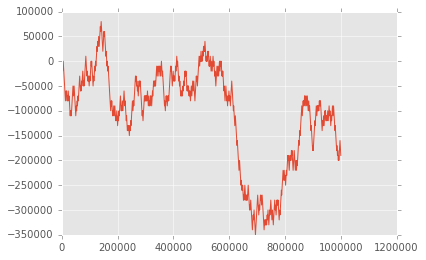

In [5]:
import random
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

'''
basic roll dice function
'''
def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True

'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count, stepWager):
    value = funds
    wager = initial_wager

    # wager X
    wX = []

    #value Y
    vY = []

    # start at 1 and step by steps size = stepWager
    currentWager = 1

    #           change this to, less or equal.
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            # append #
            wX.append(currentWager)
            vY.append(value-funds)
            
        else:
            value -= wager
            # append #
            wX.append(currentWager)
            vY.append(value-funds)

        currentWager += stepWager
        
    #print 'Funds:', value

    plt.plot(wX,vY)
    
#==========================================================
x = 0

# start this off @ 1, then add, and increase 50 to 500, then 1000
while x < 100:
    simple_bettor(10000,10000,1000001,1000)
    x += 1


plt.ylabel('Account Value - Initial funds (+/-)')
plt.xlabel('Wager Count')
plt.show()

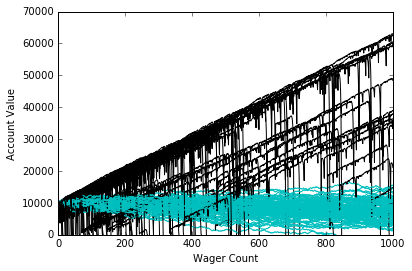

In [3]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time
% matplotlib inline

sampleSize = 100

startingFunds = 10000
wagerSize = 100
wagerCount = 1000




def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True

################################################## edit in color
def doubler_bettor(funds,initial_wager,wager_count,color):

    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * 2

                # this makes it so we just bet all that is left. 
                if (value - wager) < 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                # this makes it so we just bet all that is left. 
                if (value - wager) < 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)


                # change to equals zero!
                if value <= 0:
                    currentWager += 10000000000000000

        currentWager += 1
    ########################### this guy edits color #
    plt.plot(wX,vY,color)


'''
Simple bettor, betting the same amount each time.
'''
#####                                           color#
def simple_bettor(funds,initial_wager,wager_count,color):


    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            ### change this part, not lessthan or equal zero, it is zero
            if value <= 0:
                currentWager += 10000000000000000
        currentWager += 1

    # this guy goes green #
    plt.plot(wX,vY,color)

    
x = 0

while x < sampleSize:             
    simple_bettor(startingFunds,wagerSize,wagerCount,'c')
    #simple_bettor(startingFunds,wagerSize*2,wagerCount,'c')
    doubler_bettor(startingFunds,wagerSize,wagerCount,'k')
    x+=1

plt.axhline(0, color = 'r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()

# Compare results:

('Simple Bettor Bust Chances:', 95.6)
('Doubler Bettor Bust Chances:', 98.5)
('Simple Bettor Profit Chances:', 4.3)
('Doubler Bettor Profit Chances:', 1.5)


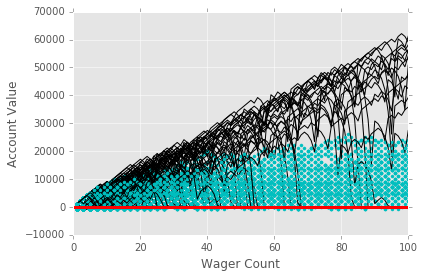

In [4]:
import random
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline
import time

# inputs:
sampleSize = 1000
startingFunds = 100
wagerSize = 1000
wagerCount = 100


# functions
'''
basic roll function
'''

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True
'''
double bettor option
'''
def doubler_bettor(funds,initial_wager,wager_count,color):
    global doubler_busts
    #####################
    global doubler_profits
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1

        currentWager += 1
    plt.plot(wX,vY,color)
    #####################
    if value > funds:
        doubler_profits+=1
        


'''
Simple bettor, betting the same amount each time.
'''

def simple_bettor(funds,initial_wager,wager_count,color):
    global simple_busts
    #####################
    global simple_profits

    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            if value <= 0:
                currentWager += 10000000000000000
                simple_busts +=1
        currentWager += 1
    plt.plot(wX,vY,color)
    #####################
    if value > funds:
        simple_profits+=1

    
x = 0



simple_busts = 0.0
doubler_busts = 0.0

#####################
simple_profits = 0.0
doubler_profits = 0.0


while x < sampleSize:             
    simple_bettor(startingFunds,wagerSize,wagerCount,'c.')
    #simple_bettor(startingFunds,wagerSize*2,wagerCount,'c')
    doubler_bettor(startingFunds,wagerSize,wagerCount,'k')
    x+=1

print(('Simple Bettor Bust Chances:', (simple_busts/sampleSize)*100.00))
print(('Doubler Bettor Bust Chances:', (doubler_busts/sampleSize)*100.00))

print (('Simple Bettor Profit Chances:', (simple_profits/sampleSize)*100.00))
print(('Doubler Bettor Profit Chances:', (doubler_profits/sampleSize)*100.00))
    

 
plt.axhline(0, color = 'r', linewidth = 3)
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()
		